In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import colorlover as cl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_50000.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification.csv
/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_5000.csv


In [2]:
! pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.2 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/kaggle/input/aids-virus-infection-prediction/AIDS_Classification_15000.csv")

In [4]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1108,1,37,88.11364,0,1,1,100,0,1,...,1,1,0,0,0,389,320,734,737,1
1,1079,0,43,66.77075,0,0,0,100,0,1,...,0,2,0,1,1,318,432,912,1213,0
2,492,1,34,82.91725,0,0,0,90,0,1,...,1,2,0,1,1,326,524,660,835,0
3,1191,1,41,98.91817,0,0,0,81,0,1,...,1,3,0,1,0,318,232,1131,982,1
4,1141,3,47,53.61717,0,1,0,100,0,0,...,0,1,0,1,0,280,337,515,679,0


In [5]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

## <div style="text-align: center"> <b>UNIVARIATE ANALYSIS</b></div>

## trt: Treatment Indicator

***About***
<div>
    <p>
        The treatment indicator provides information about the type of antiretroviral treatment regimen patients in the dataset are receiving:
    </p>
    <ul>
        <li>0 = ZDV only
            <ul>
                <li>Patients with this indicator are being treated only with Zidovudine (ZDV), also known as AZT.</li>
            </ul>
        </li>
        <li>1 = ZDV + ddI
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Didanosine (ddI). The combination therapy is often used to enhance the efficacy of treatment by using drugs with different mechanisms of action.</li>
            </ul>
        </li>
        <li>2 = ZDV + Zal
            <ul>
                <li>Patients with this indicator are being treated with a combination of Zidovudine (ZDV) and Zalcitabine (Zal). The combination of ZDV and Zal is another strategy to improve treatment effectiveness and delay the progression of the disease.</li>
            </ul>
        </li>
        <li>3 = ddI only
            <ul>
                <li>Patients with this indicator are being treated only with Didanosine (ddI). This might be an alternative regimen for patients who cannot tolerate ZDV or for whom ZDV is not effective.</li>
            </ul>
        </li>
    </ul>
</div>


***Conclusions***

In [6]:
df['trt'].value_counts()

trt
0    5550
3    4149
2    3182
1    2119
Name: count, dtype: int64

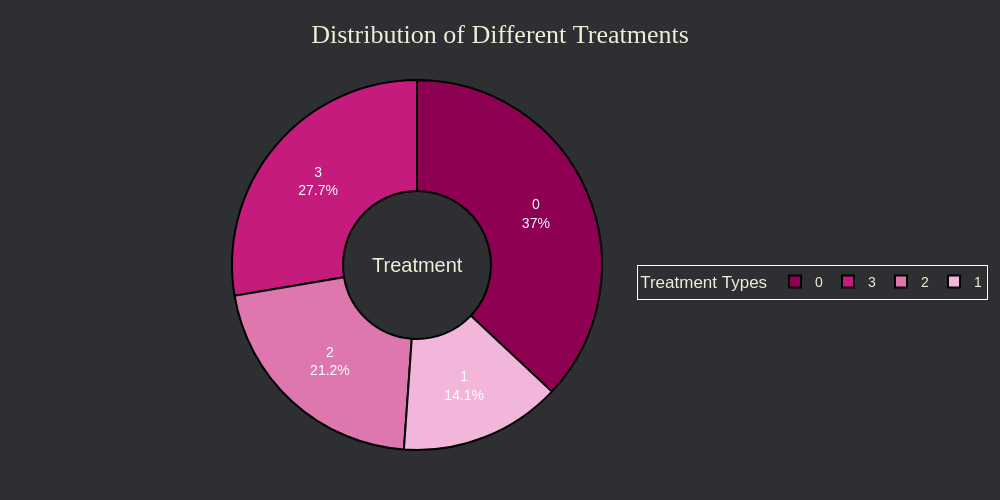

In [7]:
trt = df['trt'].value_counts().reset_index()
trt.columns = ['trt', 'count']
palette = cl.scales['11']['div']['PiYG']


trt = df['trt'].value_counts().reset_index()
trt.columns = ['trt', 'count']

palette = cl.scales['11']['div']['PiYG']

fig = go.Figure(data=[go.Pie(
    labels=trt['trt'],
    values=trt['count'],
    hole=.4,
    marker=dict(colors=palette, line=dict(color='#000000', width=2)),
    hoverinfo="label+percent+value",
    textinfo="label+percent",
    textfont=dict(size=14, color='#FFFFFF')
)])

# Update layout for better appearance and set the background to black
fig.update_layout(
    title_text="Treatment Distribution",
    title_font_size=24,
    title_font_family="Times New Roman",
    title_font_color="#f2ecda",
    paper_bgcolor='#2e2f32',
    plot_bgcolor='#2e2f32',
    annotations=[dict(text='Treatment', x=0.5, y=0.5, font_size=20, showarrow=False, font=dict(color="#f2ecda"))],
    showlegend=True,
    legend_title_text='Treatment Types',
    legend=dict(
        x=0.8,
        y=0.5,
        traceorder='normal',
        font=dict(
            family="Arial",
            size=14,
            color="#f2ecda"
        ),
        bgcolor="#2e2f32",
        bordercolor="#FFFFFF",
        borderwidth=1,
        orientation="h"  # Change the legend orientation to horizontal
    )
)

# Increase the width of the page
fig.update_layout(width=1000)

# Adding a more vibrant title and better spacing
fig.update_layout(
    title={
        'text': "Distribution of Different Treatments",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    title_font_size=26,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Show the pie chart
fig.show('png')

In [8]:
trt.head()

,trt,count
0,0,5550
1,3,4149
2,2,3182
3,1,2119
